# Predicting Realestate PrIces of cities in Ontario based on Longitude, latitude

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Import Data

In [3]:
df1 = pd.read_csv("homeprices.csv")
df1

,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...,...
25346,124922,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,124924,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,124925,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,124928,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


## Cleaning Data

### Erros in data 
##### - Null values in all columns
##### - Column 'Unnamed' is unnecessary
##### - Column '"Price " is type string 
##### - Column '"Price " has unrealistic values under 500,000


In [4]:

# Handling missing values
df2 = df1.dropna()

# Drop unnecessary columns
df4 = df2.drop("Unnamed: 0", axis=1, errors='ignore')

# Convert Price ($) to integer
df4['Price ($)'] = df4['Price ($)'].astype(int)

# Filter by minimum price
df4 = df4[df4['Price ($)'] >= 500000]




## Split Data into Training/Test sets (80:20)

In [5]:
# Split the data
train_data, test_data = train_test_split(df4, test_size=0.2, random_state=42)

# Select features and target variable for training
X_train = train_data[['lat', 'lng']]
y_train = train_data['Price ($)']

# Select features and target variable for testing
X_test = test_data[['lat', 'lng']]
y_test = test_data['Price ($)']



## Linear Regression Model 

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with AreaName, actual prices, and predicted prices
result_df = test_data[['AreaName', 'Price ($)']].copy()
result_df['Predicted Price'] = y_pred

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R^2:", model.score(X_test, y_test))
print("\nPredictions for Areas and Prices:")
print(result_df)

Mean Squared Error: 1260715324092.0237
R^2: 0.0016940343745789344

Predictions for Areas and Prices:
              AreaName  Price ($)  Predicted Price
6912        Centretown     849000     1.080670e+06
20369  Midtown Toronto     600000     1.180162e+06
19711        Thornhill     899800     1.170232e+06
17432             Ajax     588888     1.168546e+06
16394    Old East York     699000     1.181853e+06
...                ...        ...              ...
2719        Burlington     948000     1.199056e+06
5425          Waterloo     900000     1.188798e+06
6707           Orléans     500000     1.078661e+06
15263           Woburn     799000     1.175684e+06
9558     Richmond Hill     558000     1.169423e+06

[1673 rows x 3 columns]


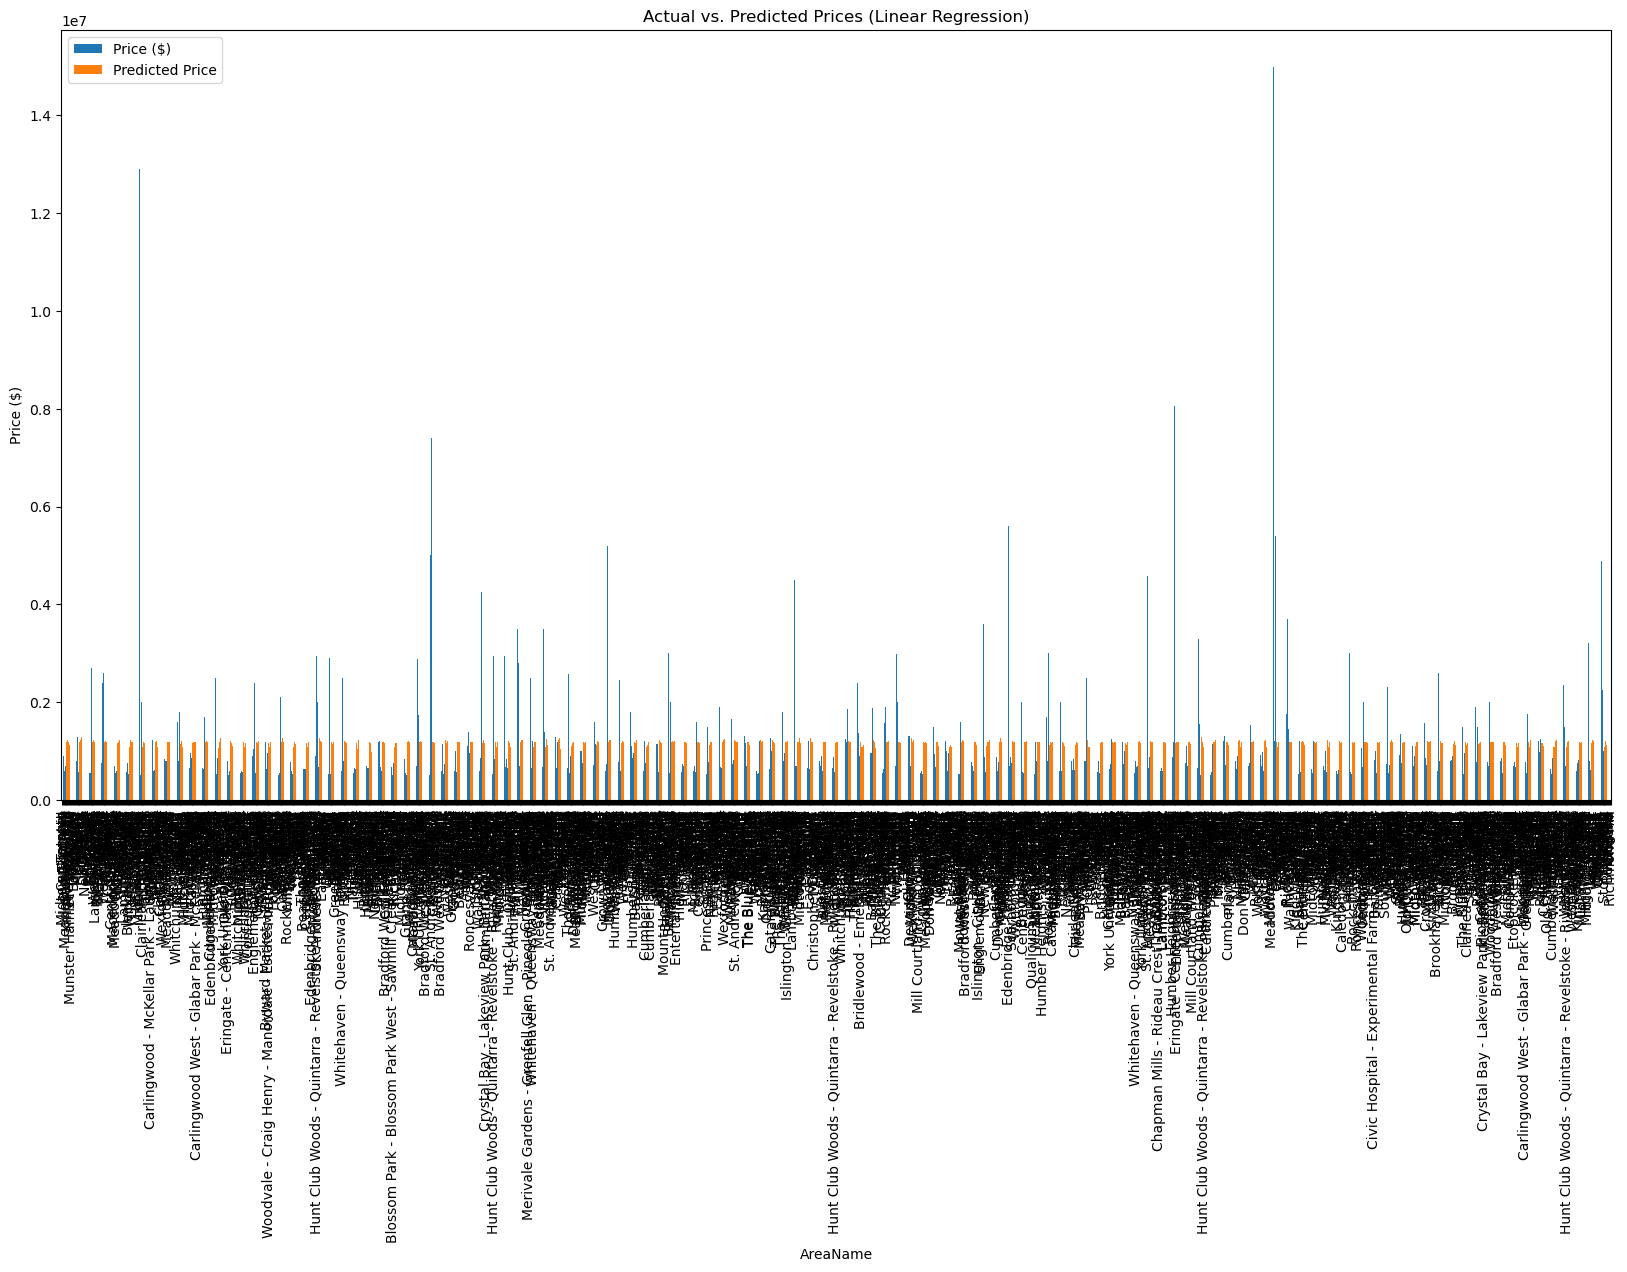

In [15]:
result_df.set_index('AreaName', inplace=True)

# Plot actual and predicted prices for Linear Regression
result_df.plot(kind='bar', figsize=(20, 10))
plt.title('Actual vs. Predicted Prices (Linear Regression)')
plt.xlabel('AreaName')
plt.ylabel('Price ($)')
plt.show()

## Decision Tree 

In [7]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

result_df_dt = test_data[['AreaName', 'Price ($)']].copy()
result_df_dt['Predicted Price (Decision Tree)'] = y_pred_dt

mse_dt = mean_squared_error(y_test, y_pred_dt)

print("\nDecision Tree:")
print("Mean Squared Error:", mse_dt)
print("R^2:", dt_model.score(X_test, y_test))
print("\nPredictions for Areas and Prices:")
print(result_df_dt)




Decision Tree:
Mean Squared Error: 1572222732606.8093
R^2: -0.24497521625961594

Predictions for Areas and Prices:
              AreaName  Price ($)  Predicted Price (Decision Tree)
6912        Centretown     849000                        1450000.0
20369  Midtown Toronto     600000                         968000.0
19711        Thornhill     899800                        3368800.0
17432             Ajax     588888                        1199000.0
16394    Old East York     699000                        1488000.0
...                ...        ...                              ...
2719        Burlington     948000                         649900.0
5425          Waterloo     900000                         549900.0
6707           Orléans     500000                         529900.0
15263           Woburn     799000                         649000.0
9558     Richmond Hill     558000                         548800.0

[1673 rows x 3 columns]


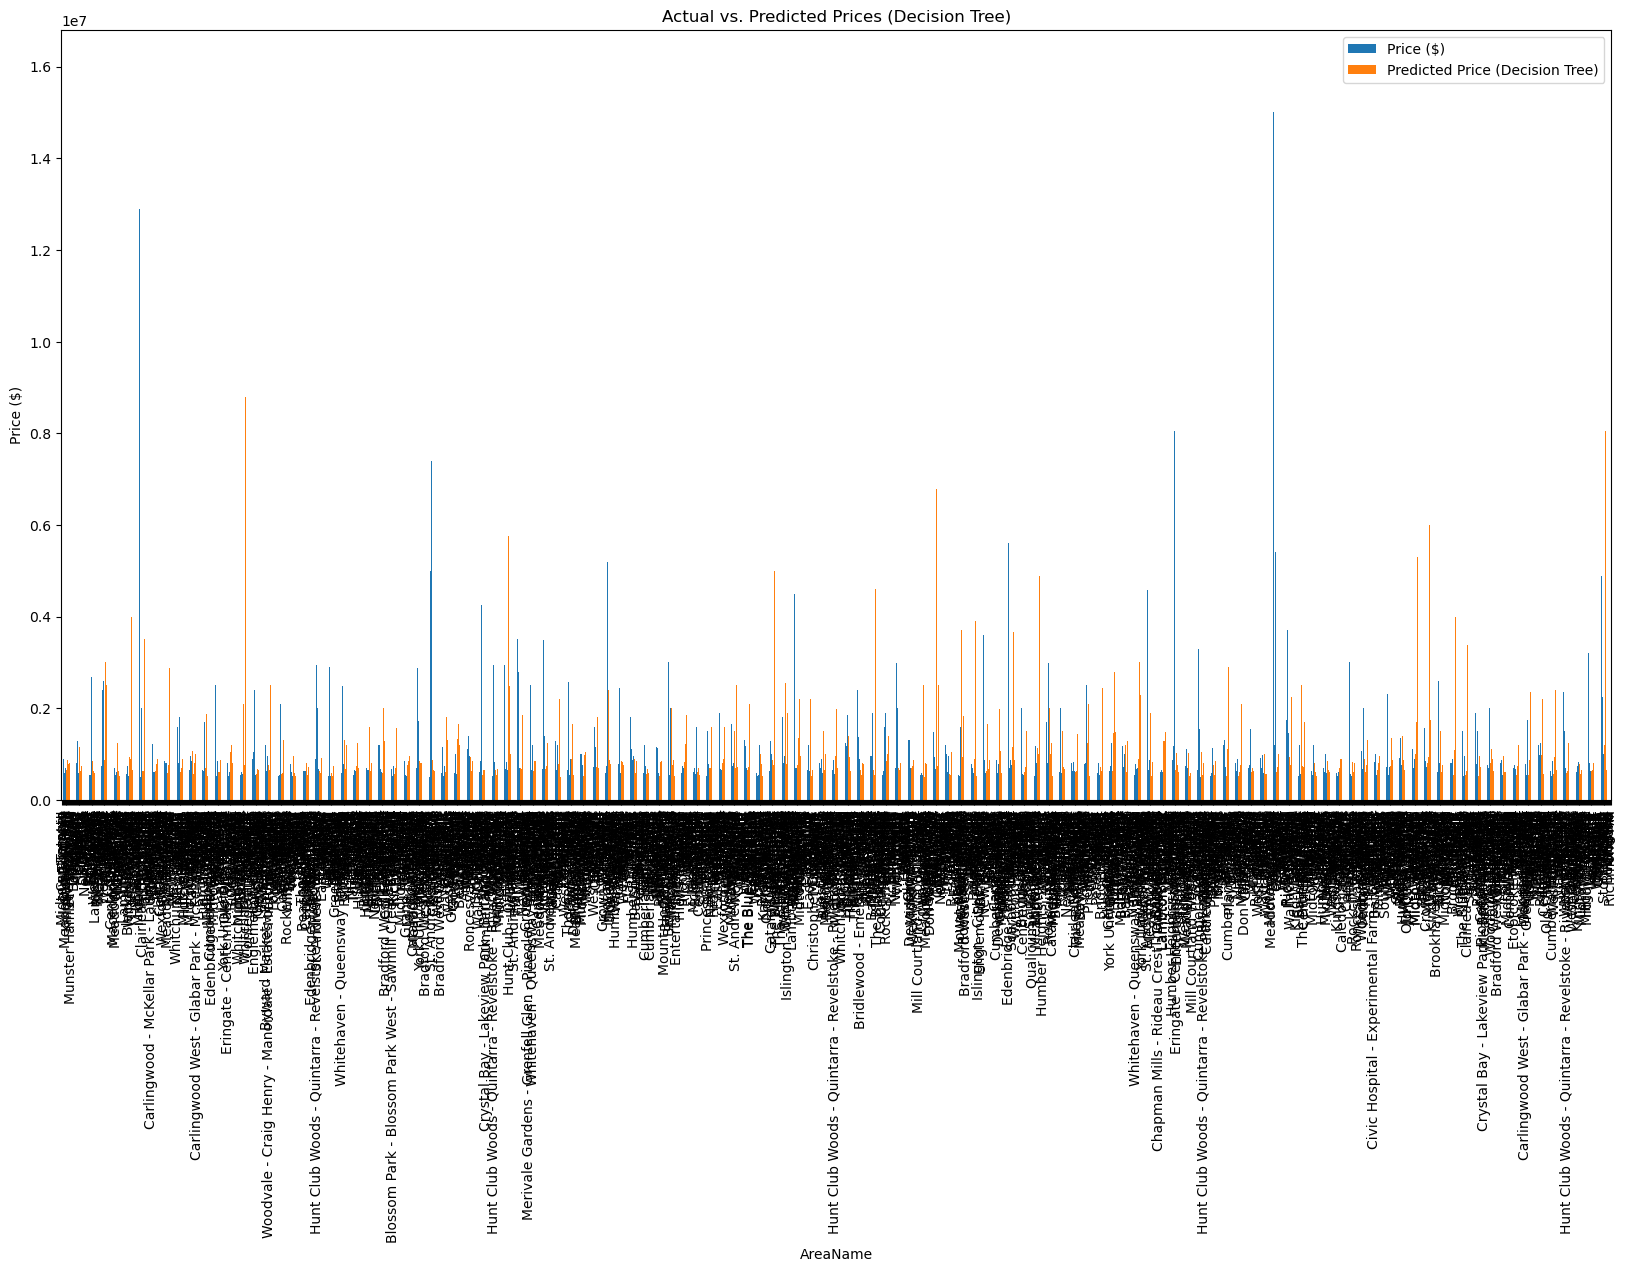

In [14]:
result_df_dt.set_index('AreaName', inplace=True) #(Takes a while to load) graph graphic 

# Plot actual and predicted prices for Decision Tree
result_df_dt.plot(kind='bar', figsize=(20, 10))
plt.title('Actual vs. Predicted Prices (Decision Tree)')
plt.xlabel('AreaName')
plt.ylabel('Price ($)')
plt.show()


## RandomForest

In [12]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

result_df_rf = test_data[['AreaName', 'Price ($)']].copy()
result_df_rf['Predicted Price (Random Forest)'] = y_pred_rf

mse_rf = mean_squared_error(y_test, y_pred_rf)

print("\nRandom Forest:")
print("Mean Squared Error:", mse_rf)
print("R^2:", rf_model.score(X_test, y_test))
print("\nPredictions for Areas and Prices:")
print(result_df_rf)



Random Forest:
Mean Squared Error: 967013985470.5167
R^2: 0.23426342799973354

Predictions for Areas and Prices:
              AreaName  Price ($)  Predicted Price (Random Forest)
6912        Centretown     849000                     1.116605e+06
20369  Midtown Toronto     600000                     9.462686e+05
19711        Thornhill     899800                     2.380831e+06
17432             Ajax     588888                     9.357268e+05
16394    Old East York     699000                     1.103777e+06
...                ...        ...                              ...
2719        Burlington     948000                     6.751320e+05
5425          Waterloo     900000                     8.941340e+05
6707           Orléans     500000                     8.123830e+05
15263           Woburn     799000                     9.316882e+05
9558     Richmond Hill     558000                     6.078113e+05

[1673 rows x 3 columns]


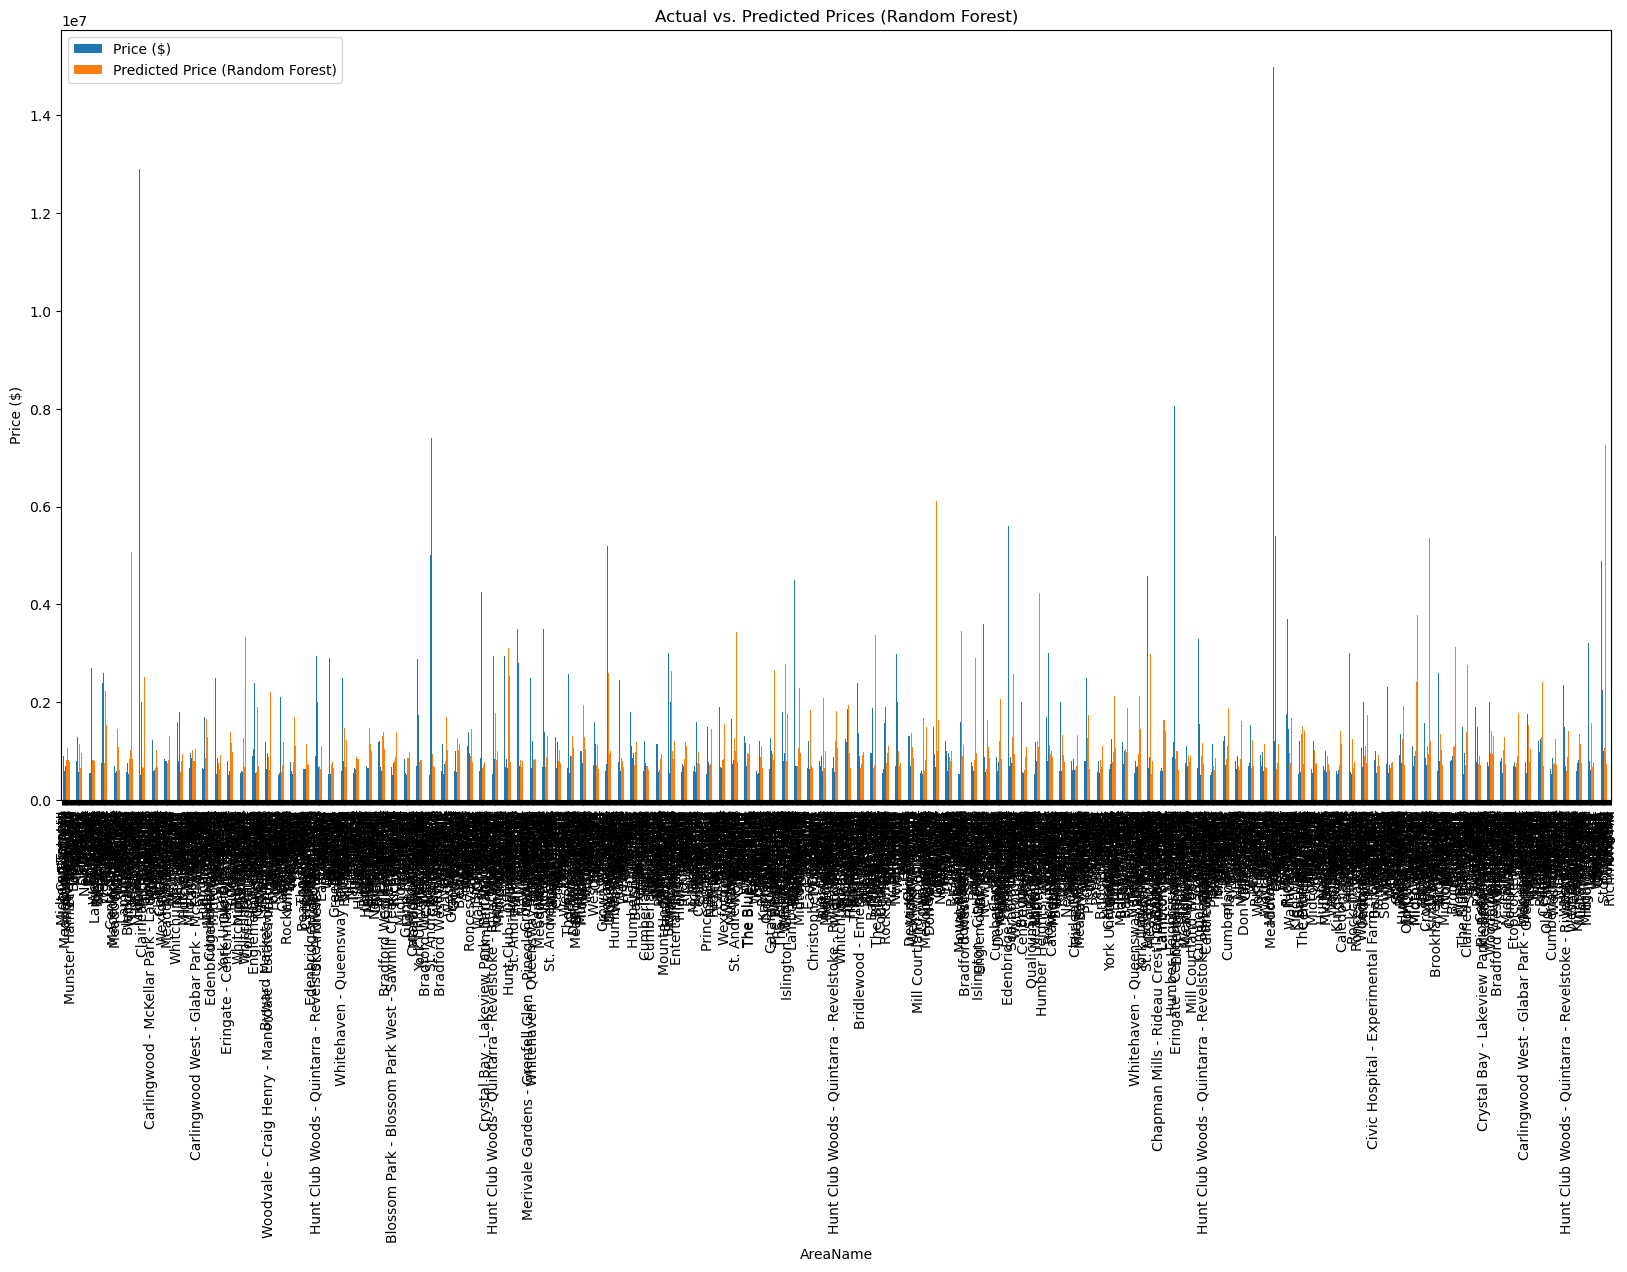

In [13]:
result_df_rf.set_index('AreaName', inplace=True)

# Plot actual and predicted prices
result_df_rf.plot(kind='bar', figsize=(20, 10))
plt.title('Actual vs. Predicted Prices (Random Forest)')
plt.xlabel('AreaName')
plt.ylabel('Price ($)')
plt.show()